In [ ]:
クラスタリング
データを幾つかの集まり（クラスタ）にわける

主成分分析
次元削減に頻繁に用いられる。
それ以外にも、探索的データ解析や株取引での信号のノイズ除去、バイオインフォマティクス分野でのゲノムデータや遺伝子発現量の解析にも応用されています。

In [ ]:
ユークリッド距離
n次元における２点間の距離
これをノルムとも呼ぶ

In [2]:
import numpy as np
vec_a = np.array([1,3,5])
vec_b = np.array([2,4,6])
print(np.linalg.norm(vec_a - vec_b))

1.73205080757


In [ ]:
コサイン類似度
２つのベクトルの類似度を表す指標



In [4]:
vec_a = np.array([0, 1])
vec_b = np.array([3, 4])
print(np.dot(vec_a, vec_b) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b)))

0.8


In [ ]:
階層的クラスタリング
階層的クラスタリング とは データの中から最も似ている組み合わせを探し出し、順番にクラスターにしていく方法であり、途中過程で階層構造になることが特徴としてあげられます。 　
過程を表したのが樹形図(デンドログラム) 

非階層的クラスタリング
非階層的クラスタリング も、階層的クラスタリングと同じくデータから似た性質のものを探し出し、クラスターを作りますが階層構造を持ちません。
データが与えられた際、開発者があらかじめいくつのクラスターに分けるかを決定し、その数分だけデータからクラスターを作り出します。 ただ、データごとに 最適なクラスター数は決まっておりません。 階層構造を持たないため、 データ量が多い場合に有効な手法といえます。
k-means法など


In [ ]:
練習用データ
sklearn.datasetsのmake_blobs
下記のコードにより、Xにデータ点 、Yにはそのデータ点が属するクラスターのラベル が入ります。



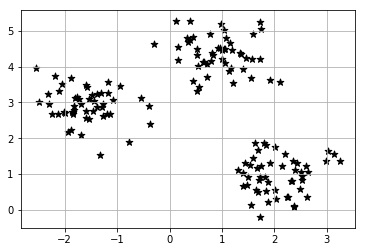

In [15]:
# sklearn.datasetsのmake_blobs関数をインポート
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
# Xには1つのプロットの(x,y)が、Yにはそのプロットの所属するクラスター番号が入る
X,Y = make_blobs(n_samples=150,   # データ点の総数
               n_features=2,          # 特徴量（次元数）の指定  default:2 
               centers=3,             # クラスター数
               cluster_std=0.5,       # クラスタ内の標準偏差 
               shuffle=True,          # サンプルをシャッフル
               random_state=0)        # 乱数生成器の状態を指定

plt.scatter(X[:,0], X[:,1], c="black", marker="*", s=50)
plt.grid()
plt.plot()
plt.show()

In [ ]:
k-means法

非階層的クラスタリングの代表的なものに、 「k-means法」 があります。

k-means法は、データを分散の等しいn個のクラスターに分けることができる手法です。 各クラスターごとに データの重心にあたる平均値 μi が割り当てられます。この重心のことを 「セントロイド」 と呼びます。分散の等しいクラスターに分けるには、「SSE」 と呼ばれる指標を用います。 SSEとは、各クラスターに含まれるデータ点とセントロイドとの差の2乗和を求めたもの(分散にあたります)であり、 k-means法 はこの SSEを全クラスターで等しくかつ最小化するようにセントロイドを選びます。

k-means法 のアルゴリズムは、3つのステップがあります。

1.はじめに、データ群の中からk個(任意の数)のデータ点を抽出し、 そのk個の点を初期のセントロイドとします。 セントロイドの初期化の後、2つのステップを反復します。

2.全てのデータ点を、最も近いセントロイドにそれぞれ割り振ります。

3.次に、各k個のセントロイドに割り振られたデータ群の重心を計算し、その重心を新たなセントロイドとして更新します。

ステップ3が終了する度に、前のセントロイドと新しくできたセントロイドの距離を計算します。 その距離がある程度小さくなったら、上記の反復処理を終了します。言い換えれば、セントロイドが更新してもほとんど動かなくなるまで反復を行います。 


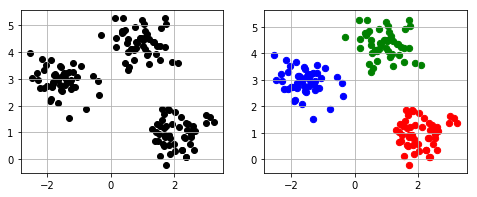

In [16]:
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# データセットの作成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)        

# k-means法を行います。
km = KMeans(n_clusters=3, random_state=0)
Y_km = km.fit_predict(X) # Y_kmに各データ点が属するクラスタのラベルが入ります

# グラフの描画
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
# 元データをプロット
ax1.scatter(X[:, 0],X[:, 1],c="black")
ax1.grid()
# クラスタリング結果をプロット
ax2.scatter(X[Y_km==0, 0],X[Y_km==0, 1],c="r",s=40,label="cluster 1")
ax2.scatter(X[Y_km==1, 0],X[Y_km==1, 1],c="b",s=40,label="cluster 2")
ax2.scatter(X[Y_km==2, 0],X[Y_km==2, 1],c="g",s=40,label="cluster 3")
ax2.grid()
plt.show()

In [ ]:
# sklearn.clusterのKMeansクラスをインポート
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,       # クラスターの個数
        nit="random",　         # セントロイドの初期値をランダムに設定  default: "k-means++"
          n_init=10,            # 異なるセントロイドの初期値を用いたk-meansの実行回数
         max_iter=300,          # k-meansアルゴリズムを繰り返す最大回数
         tol=1e-04,             # 収束と判定するための相対的な許容誤差
         random_state=0)        # 乱数発生初期化
    
Y_km = km.fit_predict(X) # クラスターが存在するデータを渡し、各サンプルに対するクラスタ番号を求める

# 上記のコードにより データからクラスターを指定した分探し出し、Y_kmに各サンプルに自動的にクラスタ番号が格納されます。 
# KMeans クラスには他にも様々な関数があります。

# クラスタリングの計算を実行
km.fit(X[, y])
# クラスタリングの計算を行い、Xを分析に用いた距離空間に変換して返す
km.fit_transform(X[, y])
# 計算に用いたパラメータを返す
km.get_params([deep])
# Xのサンプルが属しているクラスタ番号を返す
km.predict(X)
# パラメータを設定する
km.set_params(**params)
# Xを分析に用いた距離空間に変換して返す
km.transform(X[, y])


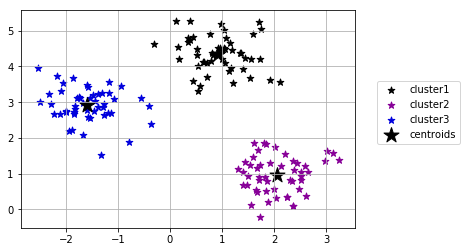

In [17]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)        

# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)


# クラスター番号(Y_km)に応じてデータをプロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km==n,0], X[Y_km==n,1], s=50, c = cm.spectral(float(n) / 10), marker="*", label="cluster"+str(n+1))
    
# セントロイドをプロット、km.cluster_centers_には各クラスターのセントロイドの座標が入っています
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c="black", label="centroids")

plt.legend(bbox_to_anchor=(1.05, 0.7),loc="upper left")
plt.grid()
plt.show()

In [ ]:
クラスタリングの性能評価関数の一つに 「SSE」(クラスタ内誤差平方和) がありますSSEを用いることにより様々なk-meansクラスタリングの性能を評価 することができます。 SSEの数式は省略しますが、SSEの値はクラスタ内の値がどれだけ離れているのかを示します。

sklearnでは KMeans クラスのinertia_ 属性を通じて SSEの値を取得できます 。各データが 自身の属するクラスター重心からどれほどずれているか(分散)の総和 が SSE であるため、SSEの値が小さいほどクラスタリングがうまくいっているモデル と言えます。

# クラスタ内誤差平方和にアクセスする
print ("Distortion: %.2f"% km.inertia_)

Distortion: 72.48


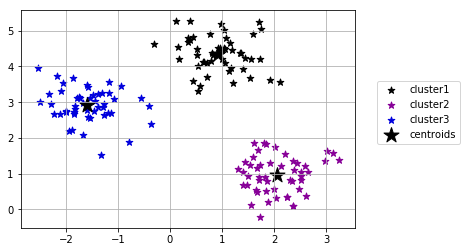

In [18]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)     

# KMeansクラスからkmインスタンスを作成
km = KMeans(n_clusters=3,            # クラスターの個数 # 変更してみてください
            init="random",           # セントロイドの初期値をランダムに設定  default: "k-means++"
            n_init=1,               # 異なるセントロイドの初期値を用いたk-meansの実行回数
            max_iter=300,            # k-meansアルゴリズムを繰り返す最大回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # 乱数発生初期化

# fit_predictメソッドによりクラスタリングを行う
Y_km = km.fit_predict(X)

# SSE値を出力
print("Distortion: %.2f"% km.inertia_)

# プロット
for n in range(np.max(Y_km)+1):
    plt.scatter(X[Y_km==n,0], X[Y_km==n,1], s=50, c = cm.spectral(float(n) / 10), marker="*", label="cluster"+str(n+1))
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c="black", label="centroids")
plt.legend(bbox_to_anchor=(1.05, 0.7),loc="upper left")
plt.grid()
plt.show()

In [ ]:
エルボー法

k-meansクラスタリングで指定するクラスター数はどう決めれば良いか といった問題があります。

このクラスター数を決定する時に参考になる手法があります。これは、 エルボー法 と呼ばれ、 クラスタ数を大きくしていった時にSSEがどのように変化するか プロットし、その結果から k-meansのクラスタ数を決定する 手法です。問題にあるコードを実行すればわかりますが、 SSEの値がガクンと曲がる点があります。この時のクラスター数が最適なものとみなすことができます。 プロットの形状が肘が曲がっているように見えることから、エルボー法と呼ばれています。ただ、現実的には問題の結果図のような綺麗にある点でグラフが落ち込むようなエルボー図が得られることはなかなかありません。


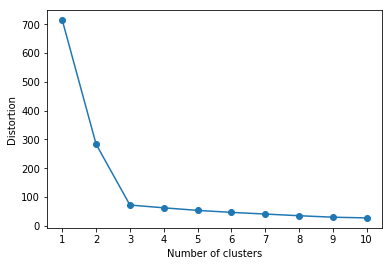

In [19]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# サンプルデータの生成
X,Y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)     

distortions = []
for i  in range(1,11):                # クラスター数1~10を一気に計算 
    km = KMeans(n_clusters=i,
                init="k-means++",     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         # クラスタリングのを実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる
    
# グラフのプロット
plt.plot(range(1,11),distortions,marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
今まで見てきた k-means法 は、クラスター中心に出来るだけデータが集まる ようにクラスタリングしていました。そのため、必然的に クラスターは円形(球状)に近い形 を取ります。 クラスターの大きさ・形に偏りがないときは効果を発揮します が、 クラスターの大きさ・形に偏りがあるデータの場合は良いクラスタリングができない 傾向にあります。

k-means法 に対して、別の非階層クラスタリングのアルゴリズムに 「DBSCAN」 があります。「DBSCAN」 のアルゴリズムは、 クラスターを高密度(データが凝集している)の場所を低密度の場所から分離して 捉えます。クラスターサイズ・形に偏りがある際に真価を発揮します。

「DBSCAN」 では、2つのパラメータを定義します。 min_samplesとepsです。 「DBSCAN」 のアルゴリズムでは、次の 3種類 にデータ点を分類します

1.あるデータの半径 eps 内に min_sample 数だけのデータがある場合、そのデータ点は コア点 とみなします。

2.また、コア点 ではないが、コア点から半径 eps 内に入っているデータは、ボーダー点とみなします。 

3.どちらにも満たさないデータ点は、ノイズ点 と見まします。

コア点の集まり からクラスターを形成 します。ボーダー点 は、最も近いコア点の属するクラスターに割り振られます。 このように 「DBSCAN」 のアルゴリズムでは、全データを3つのデータに分類することにより、 偏ったデータや、平均的ではないクラスターも分類できるようになり、ノイズを正しく除去することもできます。

「DBSCAN」 は、sklearn.clusterのDBSCANクラスを利用することができます。主なパラメータとして、eps、min_samples、 metricにより距離計算法を指定します。

from sklearn.cluster import DBSCAN
df = DBSCAN(eps=0.2,
            min_samples=5,
            metric="euclidean")
Y_db = db.fit_predict(X)

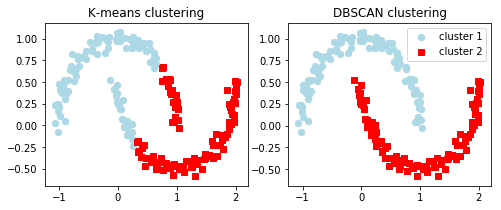

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# 月型のデータを生成
X, Y = make_moons(n_samples=200, noise=0.05, random_state=0)

# グラフと2つの軸を定義 左はk-means法用、右はDBSCAN用
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

#k-means法
km = KMeans(n_clusters=2, random_state=0)
Y_km = km.fit_predict(X)

ax1.scatter(X[Y_km==0, 0], X[Y_km==0, 1], c="lightblue", marker="o", s=40, label="cluster 1")
ax1.scatter(X[Y_km==1, 0], X[Y_km==1, 1], c="red", marker="s", s=40, label="cluster 2")
ax1.set_title("K-means clustering")

# DBSCANでクラスタリング # コードを完成してください
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
Y_db = db.fit_predict(X)

ax2.scatter(X[Y_db==0, 0], X[Y_db==0, 1], c="lightblue", marker="o", s=40, label="cluster 1")
ax2.scatter(X[Y_db==1, 0], X[Y_db==1, 1], c="red", marker="s", s=40, label="cluster 2")
ax2.set_title("DBSCAN clustering")
plt.legend()
plt.show()